## Data Visualisation with ggplot2

### Load the tidyverse and data frame into your R session

Load the `tidyverse` and the `lubridate` packages. `lubridate` is installed with the `tidyverse`, but is not one of the core `tidyverse` packages loaded with `library(tidyverse)`, so it needs to be explicitly called. `lubridate` makes working with dates and times easier in R.

In [1]:
library(tidyverse) # load the core tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──



✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1



── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(lubridate)  # load lubridate


Attaching package: ‘lubridate’




The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
books2 <- read_csv("data_output/books_reformatted.csv")  # load the data and assign it to books


── Column specification ────────────────────────────────────────────────────────
cols(
  callnumber = col_character(),
  title = col_character(),
  author = col_character(),
  location = col_character(),
  tot_chkout = col_double(),
  loutdate = col_character(),
  subject = col_character(),
  isbn = col_character(),
  callnumber2 = col_character(),
  pubyear = col_double(),
  format = col_character(),
  subCollection = col_character(),
  call_class = col_character()
)




### Plotting with `ggplot2`

Base R contains a number of functions for quick data visualization such as `plot()` for scatter plots, `barplot()`, `hist()` for histograms, and `boxplot()`. However, just as data manipulation is easier with `dplyr` than Base R, so data visualization is easier with `ggplot2` than Base R. `ggplot2` is a [“grammar” for data visualization](http://vita.had.co.nz/papers/layered-grammar.html) also created by Hadley Wickham, as an implementation of Leland Wilkinson’s [Grammar of Graphics](https://www.worldcat.org/title/grammar-of-graphics/oclc/934513040).

`ggplot` is a plotting package that makes it simple to create complex plots from data stored in a data frame. It provides a programmatic interface for specifying what variables to plot, how they are displayed, and general visual properties. Therefore, we only need minimal changes if the underlying data change or if we decide to change from a bar plot to a scatterplot. This helps in creating publication quality plots with minimal amounts of adjustments and tweaking.

Let’s create a `booksPlot` and limit our visualization to only items in `subCollection` general collection, juvenile, and k-12, and filter out items with `NA` in `call_class`. We do this by using the `|` key on the keyboard to specify a boolean OR, and use the `!is.na()` function to keep only those items that are NOT NA in the call_class column.

In [7]:
# create a new data frame
booksPlot <- books2 %>%
  filter(subCollection == "general collection" | 
           subCollection == "juvenile" | 
           subCollection == "k-12 materials",
         !is.na(call_class))


`ggplot2` functions like data in the ‘long’ format, i.e., a column for every dimension, and a row for every observation. Well-structured data will save you lots of time when making figures with `ggplot2`

ggplot graphics are built step by step by adding new elements. Adding layers in this fashion allows for extensive flexibility and customization of plots.

To build a ggplot, we will use the following basic template that can be used for different types of plots:

In [8]:
ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) +  <GEOM_FUNCTION>()

ERROR: Error in parse(text = x, srcfile = src): <text>:1:15: unexpected '<'
1: ggplot(data = <
                  ^


Use the `ggplot()` function and bind the plot to a specific data frame using the data argument.

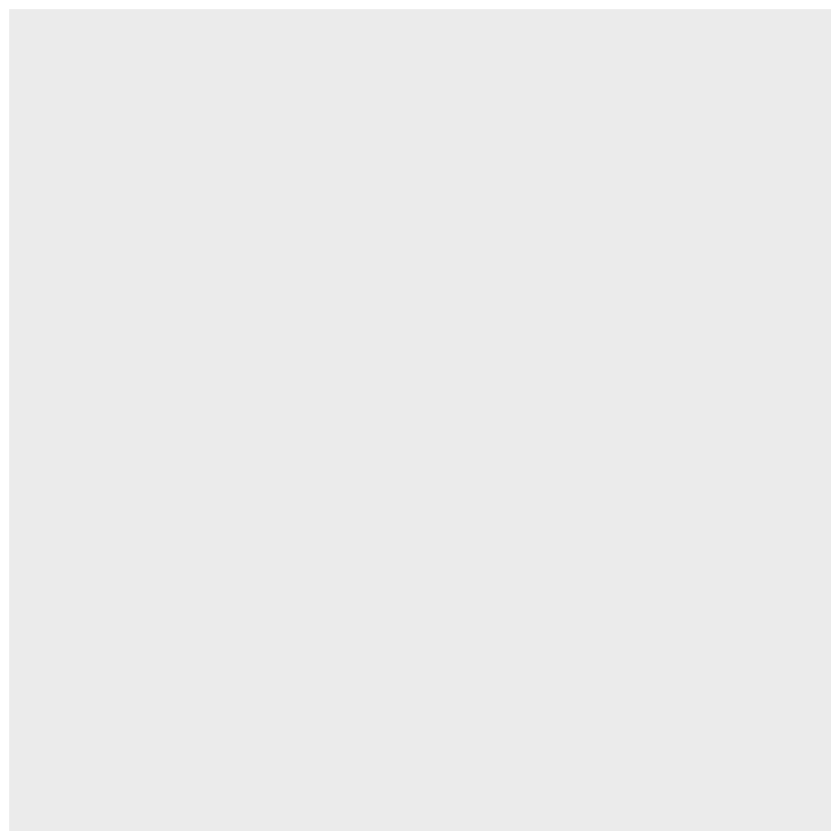

In [9]:
ggplot(data = booksPlot)  # a blank canvas

Not very interesting. We need to add layers to it by defining a mapping aesthetic and adding `geoms`.

### Define a mapping with `aes()` and display data with `geoms`

Define a mapping (using the aesthetic (`aes()`) function), by selecting the variables to be plotted and specifying how to present them in the graph, e.g. as x/y positions or characteristics such as size, shape, color, etc.

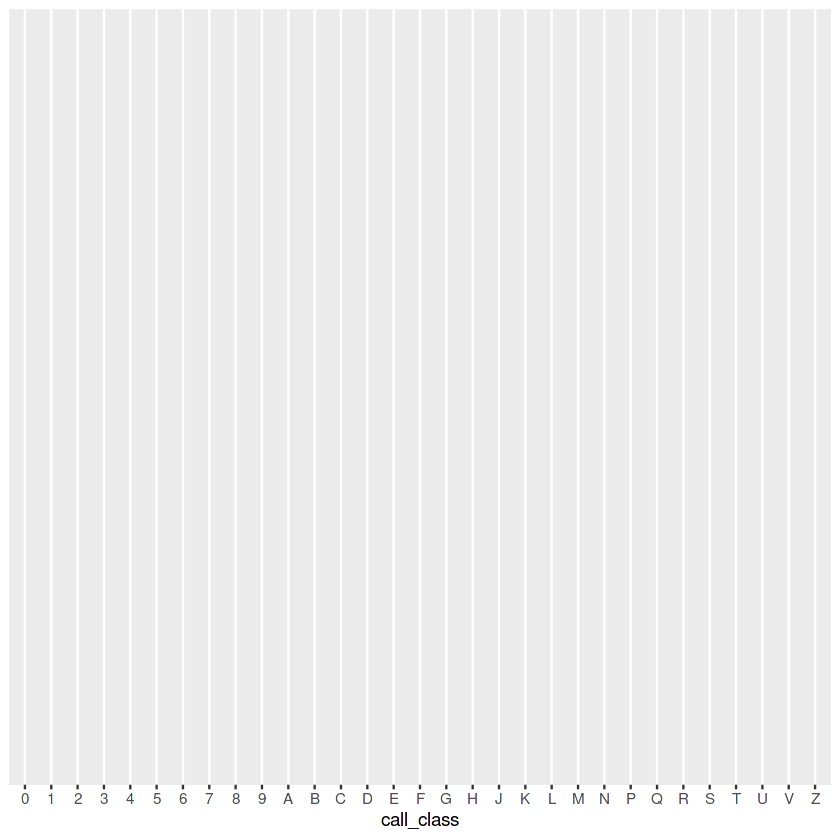

In [10]:
ggplot(data = booksPlot, mapping = aes(x = call_class)) # define the x axis aesthetic

Here we define the x axes, but because we have not yet added any `geoms`, we still do not see any data being visualized.

Data is visualized in the canvas with “geometric shapes” such as bars and lines; what are called geoms. In your console, type `geom_` and press the tab key to see the geoms included–there are over 30. For example:

- `geom_point()` for scatter plots, dot plots, etc.
- `geom_boxplot()` for boxplots
- `geom_bar()` for barplots
- `geom_line()` for trend lines, time series, etc.

Each geom takes a `mapping` argument within the `aes()` call. This is called the aesthetic mapping argument. In other words, inside the geom function is an `aes()` function, and inside `aes()` is a mapping argument specifying how to map the variables inside the visualization. ggplot then looks for that variable inside the data argument, and plots it accordingly.

For example, in the below expression, the `call_class` variable is being mapped to the `x` axis in the geometric shape of a bar. In this example, the y axis (count) is not specified, nor is it a variable in the original dataset, but is the result of geom_bar() binning your data inside each call number class and plotting the bin counts (the number of items falling into each bin).

To add a geom to the plot use the `+` operator.

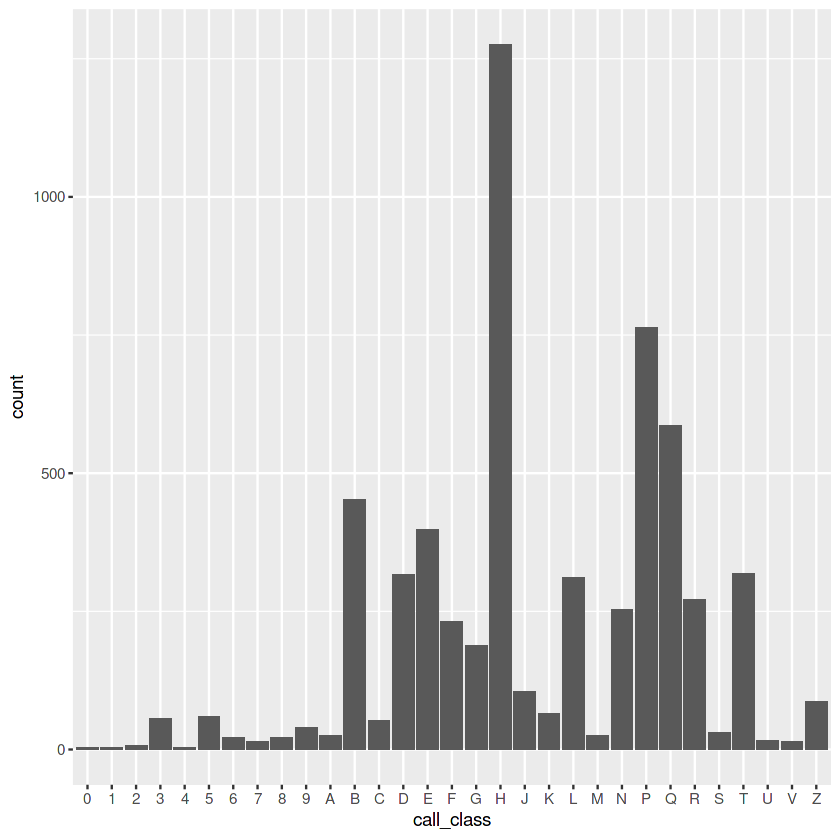

In [11]:
# add a bar geom and set call_class as the x axis
ggplot(data = booksPlot, mapping = aes(x = call_class)) +
  geom_bar()

We can see that there are about 1,500 books in the H class, 1,000 books in the P class, 700 books in the E class, etc. As we shall see, the number of E and F books are deceptively large, as easy books and fiction books both begin with E and are thus lumped into that category, though they are not of the E and F Library of Congress call number classification.

#### ggplot tips

- Anything you put in the `ggplot()` function can be seen by any geom layers that you add (i.e., these are universal plot settings). This includes the x- and y-axis mapping you set up in `aes()`.
- You can also specify mappings for a given geom independently of the mapping defined globally in the `ggplot()` function.
- The `+` sign used to add new layers must be placed at the end of the line containing the previous layer. If, instead, the + sign is added at the beginning of the line containing the new layer, `ggplot2` will not add the new layer and will return an error message.

### Univariate geoms

“Univariate” refers to a single variable. A histogram is a univariate plot: it shows the frequency counts of each value inside a single variable. Let’s say we want to visualize a frequency distibution of checkouts in the `booksPlot` data. In other words, how many items have 1 checkout? How many have 2 checkouts? And so on.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



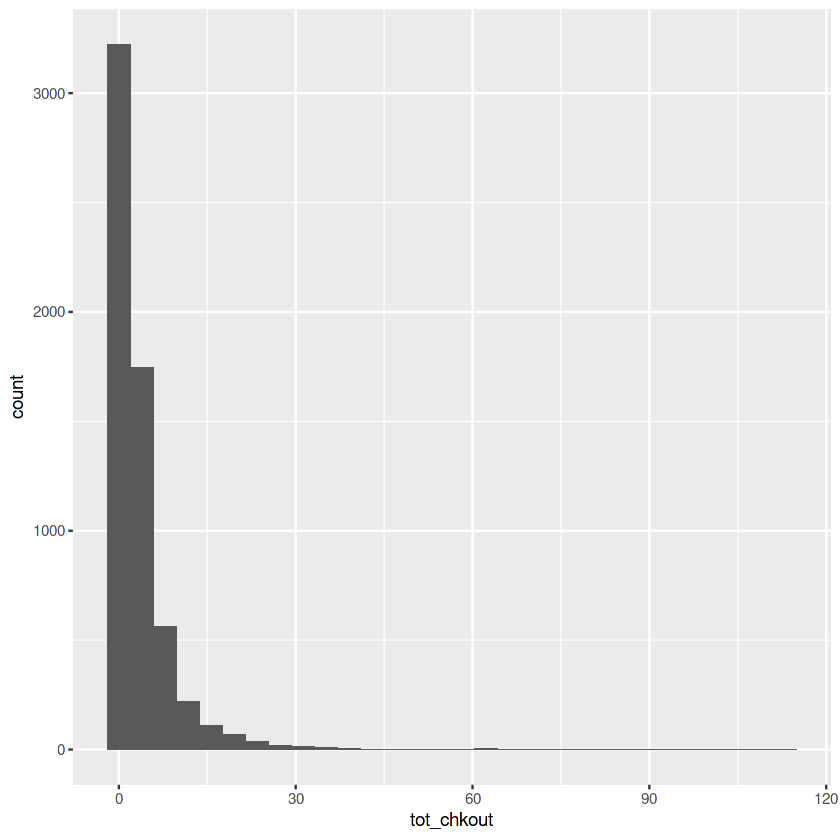

In [12]:
ggplot(data = booksPlot, mapping = aes(x = tot_chkout)) +
  geom_histogram()

As we have seen in previous lessons, the overwhelming majority of books have a small amount of usage, so the plot is heavily skewed. As anyone who has done collection analysis has encountered, this is a very common issue. It can be addressed in two ways:

First, add a `binwidth` argument to `aes()`. In a histogram, each bin contains the number of occurrences of items in the data set that are contained within that bin. As stated in the documentation for `?geom_histogram`, “You should always override this value, exploring multiple widths to find the best to illustrate the stories in your data.”

Second, change the scales of the `y` axes by adding another argument to ggplot:

Warning message:
“Transformation introduced infinite values in continuous y-axis”


Warning message:
“Removed 2 rows containing missing values (geom_bar).”


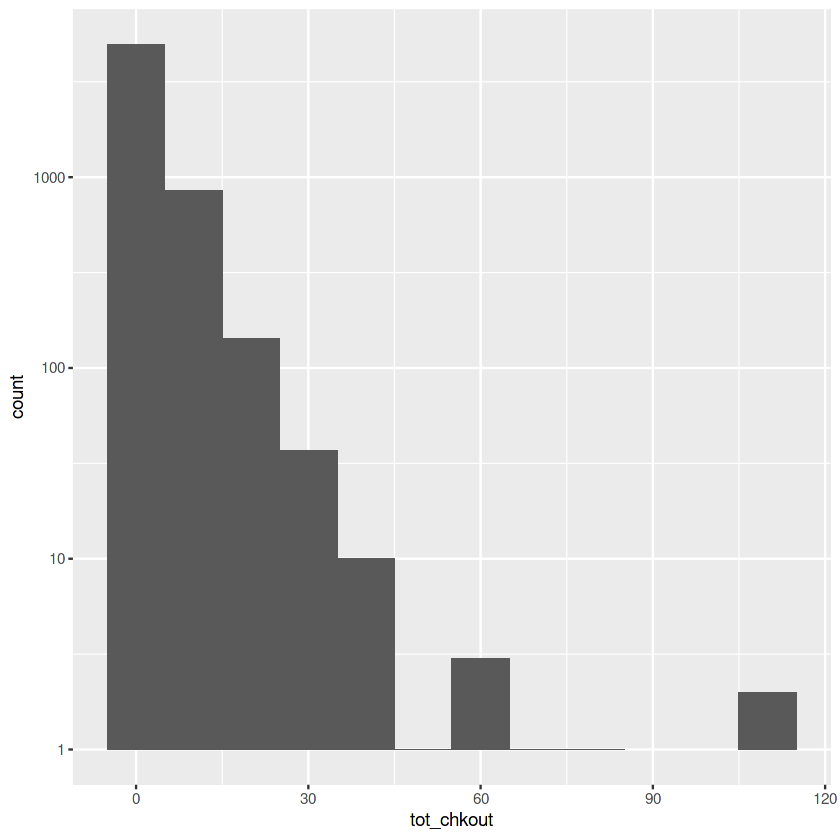

In [13]:
ggplot(data = booksPlot) +
  geom_histogram(aes(x = tot_chkout), binwidth = 10) +
  scale_y_log10()

Notice the scale y axis now goes from 0-10, 10-100, 100-1000, and 1000-10000. This is called “logarithmic scale” and is based on orders of magnitude. We can therefore see that over 5,000 books (on the y axis) have between 0-10 checkouts (on the x axis), 1,000 books have 10-20 checkouts, and further down on the x axis, a handful of books have 60-70 checkouts, and a handful more have around 100 checkouts.

We can check this with `table()`:

In [15]:
table(booksPlot$tot_chkout)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
2348  875  638  464  362  282  199  146  118   97   84   50   41   46   40   33 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
  17   20   26   17   14   12    7   15    7    8    6    6    3    3    2    4 
  32   33   34   35   36   38   39   40   41   43   47   61   63   69   79  106 
   1    5    4    3    2    2    3    1    1    1    1    1    2    1    1    1 
 113 
   1 

ggplot has thus given us an easy way to visualize the distribution of checkouts. If you test this on your own print and ebook usage data, you will likely find something similar.

#### Changing the geom

This same exact data can be visualized in a couple different ways by replacing the `geom_histogram()` function with either `geom_density()` (adding a logarithmic x scale) or `geom_freqpoly()`:

Warning message:
“Transformation introduced infinite values in continuous x-axis”


Warning message:
“Removed 2348 rows containing non-finite values (stat_density).”


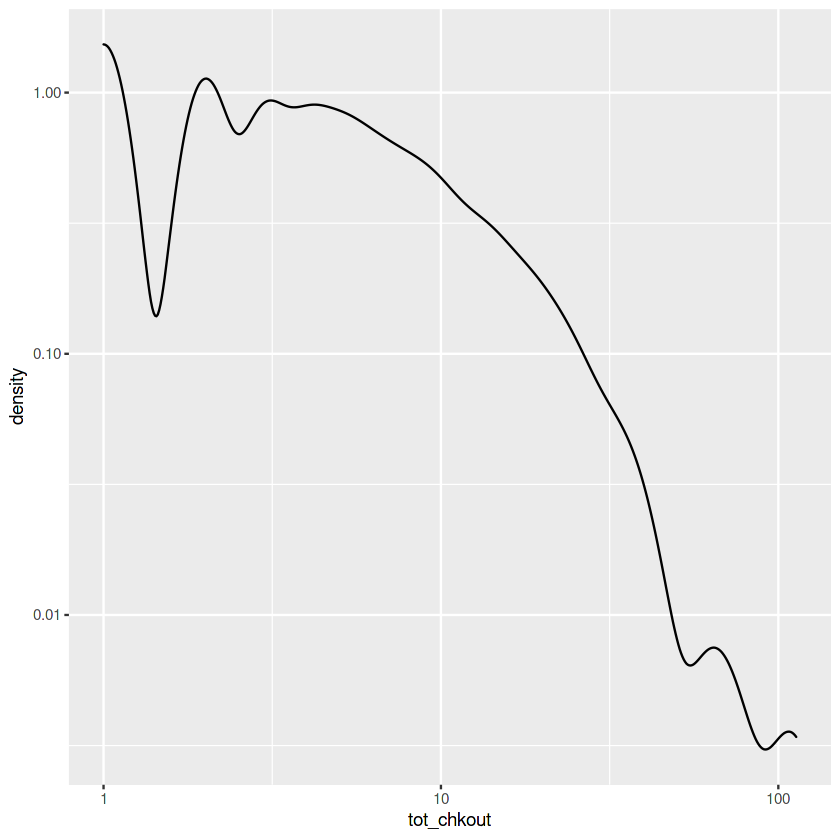

In [16]:
# create a density plot
ggplot(data = booksPlot) +
  geom_density(aes(x = tot_chkout)) +
  scale_y_log10() +
  scale_x_log10()

Warning message:
“Transformation introduced infinite values in continuous y-axis”


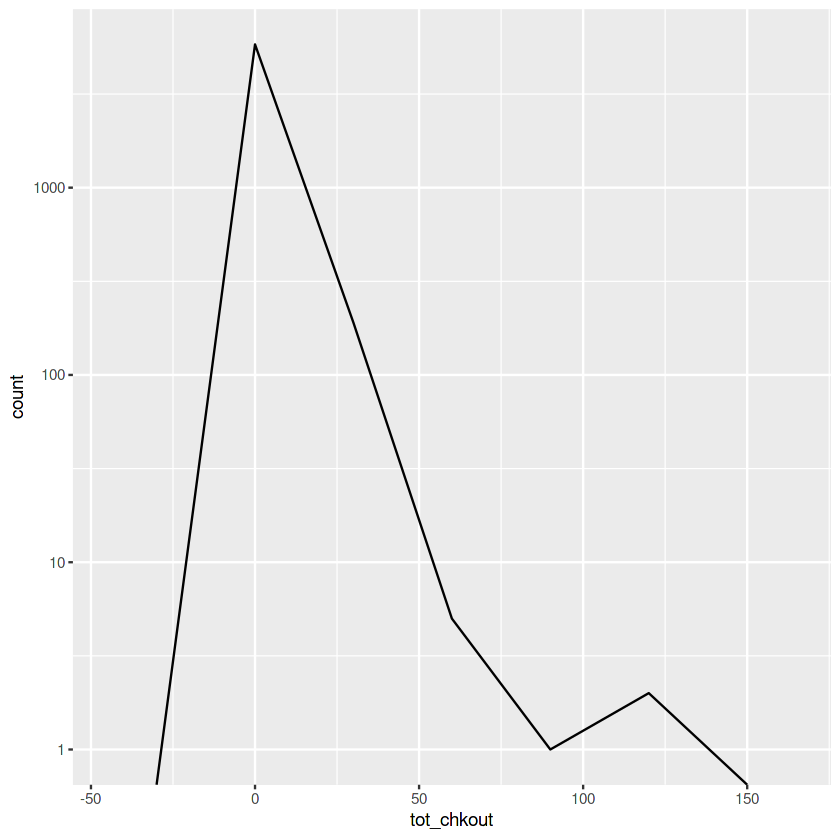

In [17]:
# create a frequency polygon
ggplot(data = booksPlot) +
  geom_freqpoly(aes(x = tot_chkout), binwidth = 30) +
  scale_y_log10()

### Bivariate geoms

Bivariate plots visualize two variables. Let’s take a look at some higher usage items, but first eliminate the `NA` values and keep only items with more than 10 checkouts, which we will do with `filter()` from the `dplyr` package and assign it to `booksHighUsage`

In [18]:
# filter booksPlot to include only items with over 10 checkouts
booksHighUsage <- booksPlot %>%
  filter(!is.na(tot_chkout),
                tot_chkout > 10)

We then visualize checkouts by call number with a scatter plot. There is still so much skew that I retain the logarithmic scale on the y axis with `scale_y_log10()`.

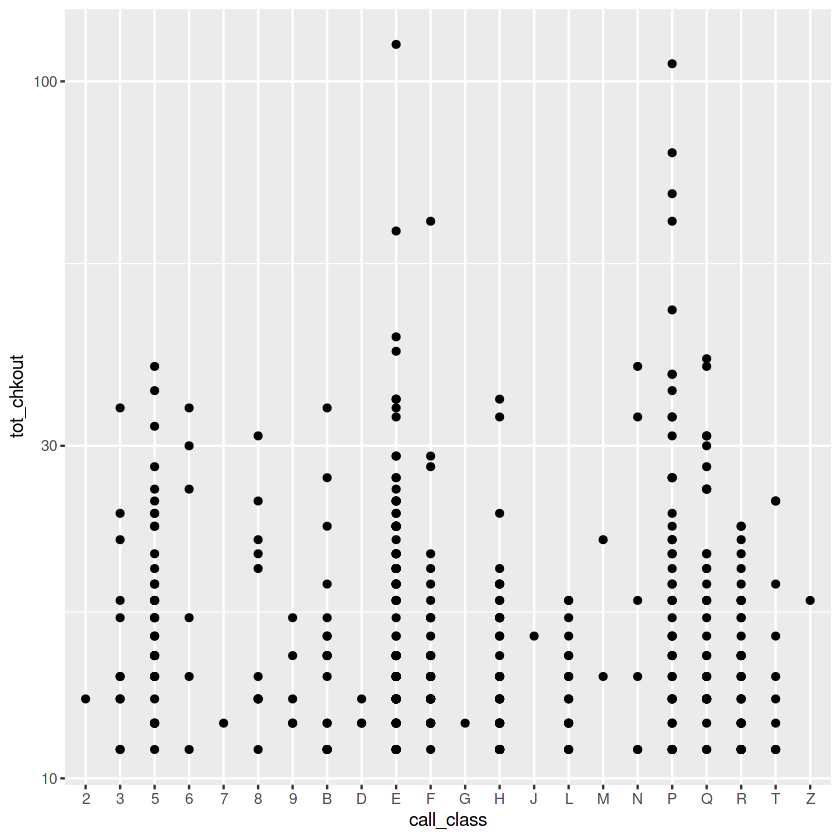

In [19]:
# scatter plot high usage books by call number class
ggplot(data = booksHighUsage,
       aes(x = call_class, y = tot_chkout)) +
  geom_point() +
  scale_y_log10()

Again, notice the scale on the y axis. We can obseve a few items of interest here: No items in the D, J, M, and Z class have more than 30 checkouts. An item in the E class has the most checkouts with over 100, but, as noted above, this includes Easy books classified with E, not just items with Library of Congress E classification (United States history) an issue we’ll look at further down.

Just as with univariate plots, we can use different geoms to view various aspects of the data, which in turn reveal different patterns.

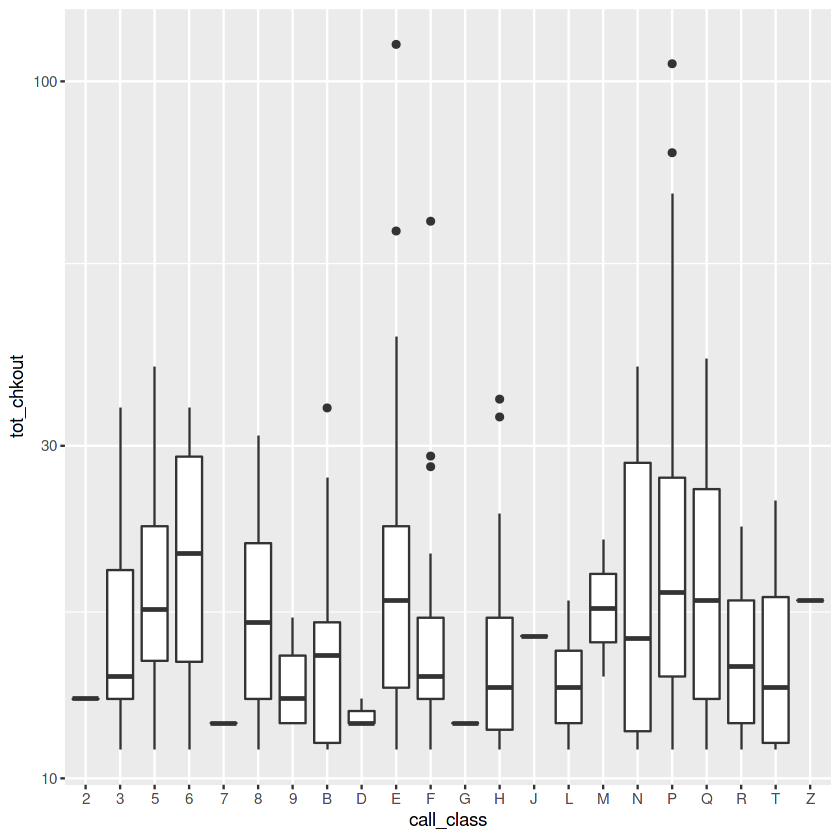

In [20]:
# boxplot plot high usage books by call number class
ggplot(data = booksHighUsage,
       aes(x = call_class, y = tot_chkout)) +
  geom_boxplot() +
  scale_y_log10()

By adding points to a boxplot, we can have a better idea of the number of measurements and of their distribution. Here we set the boxplot `alpha` to 0, which will make it see-through. We also add another layer of geom to the plot called `geom_jitter()`, which will introduce a little bit of randomness into the position of our points. We set the `color` of these points to `"tomato"`.

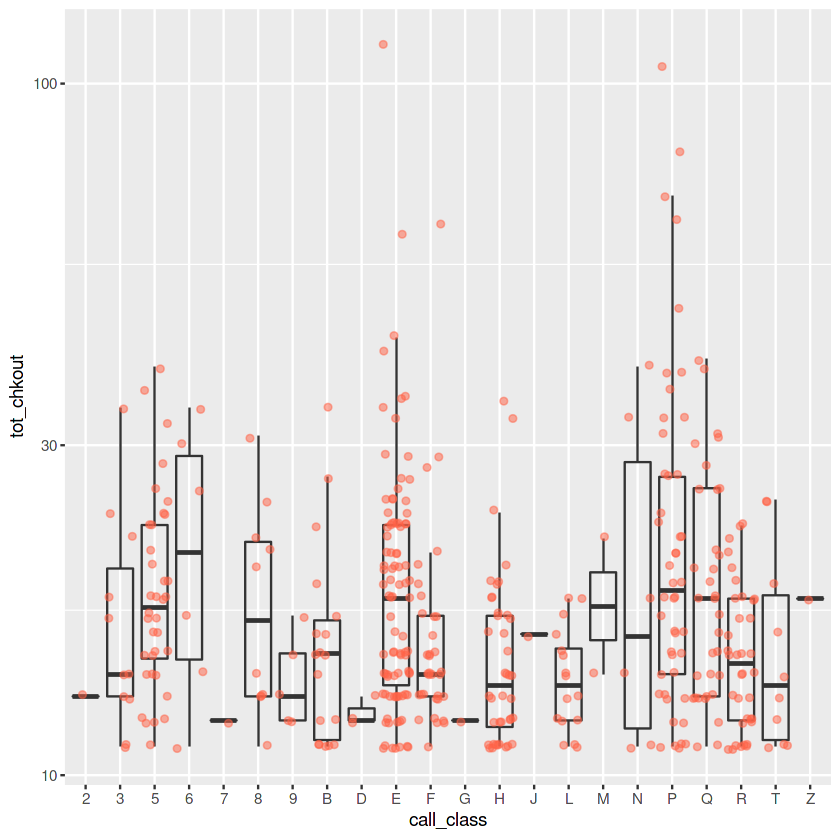

In [21]:
ggplot(data = booksHighUsage, aes(x = call_class, y = tot_chkout)) +
  geom_boxplot(alpha = 0) +
  geom_jitter(alpha = 0.5, color = "tomato") +
  scale_y_log10()

Notice how the boxplot layer is behind the jitter layer? What do you need to change in the code to put the boxplot in front of the points such that it’s not hidden?

#### Plotting exercise

Boxplots are useful summaries, but hide the shape of the distribution. For example, if the distribution is bimodal, we would not see it in a boxplot. An alternative to the boxplot is the violin plot, where the shape (of the density of points) is drawn.

Replace the box plot with a violin plot; see `geom_violin()`.

- Add color to the geom_jitter argument on your boxplot according to the item subCollection. Hint: If you get the error object 'subCollection' not found or invalid color name 'subCollection' then consider color as an aesthetic mapping.

So far, we’ve looked at the distribution of checkouts within call number ranges. Try making a new plot to explore the distribution of checkouts within another variable.

- Still using the `booksHighUsage` data, create a boxplot for `tot_chkout` for each `subCollection`. Overlay the boxplot layer on a jitter layer to show actual measurements. Keep the `scale_y_log10` argument.

### Add a third variable

As we saw in that exercise, you can convey even more information in your visualization by adding a third variable, in addition to the first two on the x and y scales.

#### Add a third variable with `aes()`

We can use arguments in `aes()` to map a visual aesthetic in the plot to a variable in the dataset. Specifically, we will map `color` to the `subCollection` variable. Because we are now mapping features of the data to a color, instead of setting one color for all points, the color now needs to be set inside a call to the `aes` function. `ggplot2` will provide a different color corresponding to different values in the vector. In other words, associate the name of the aesthetic (`color`) to the name of the variable (`subCollection`) inside `aes()`:

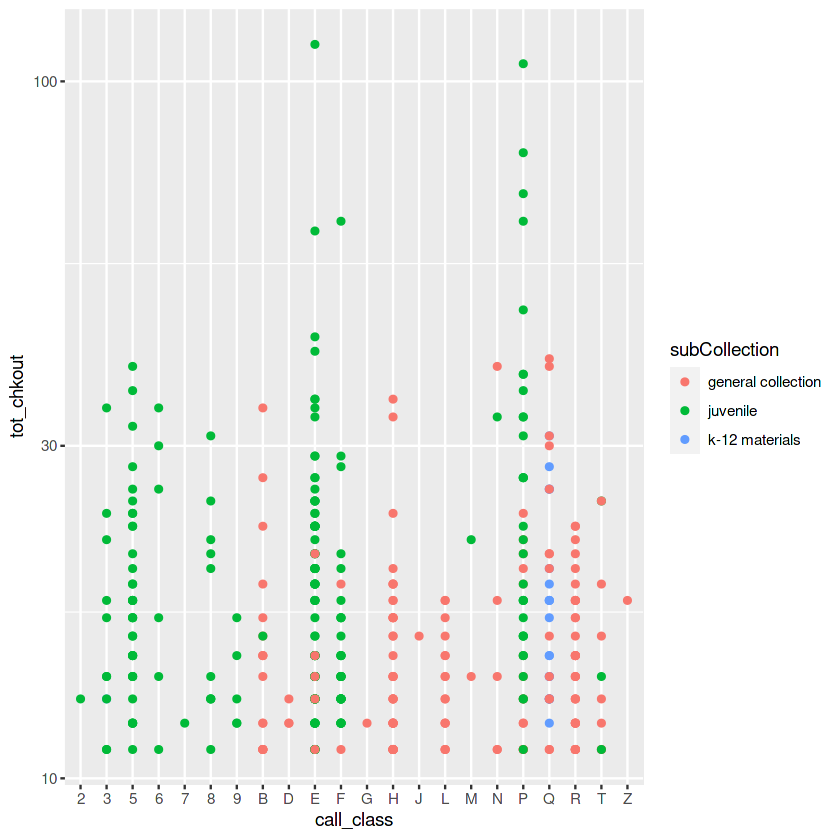

In [22]:
ggplot(data = booksHighUsage,
       aes(x = call_class,
           y = tot_chkout,
           color = subCollection)) +
  geom_point() +
  scale_y_log10()

`ggplot()` automatically assigns a unique level of the aesthetic to each unique value of the variable (this is called scaling). Now we reveal indeed that youth materials make up a large number of high usage items in both the E and the P class.

Use `fill()` with `geom_bar()` to create a stacked bar plot to visualize frequency. Again, this reinforced the fact that most of the E and P classification are youth materials.

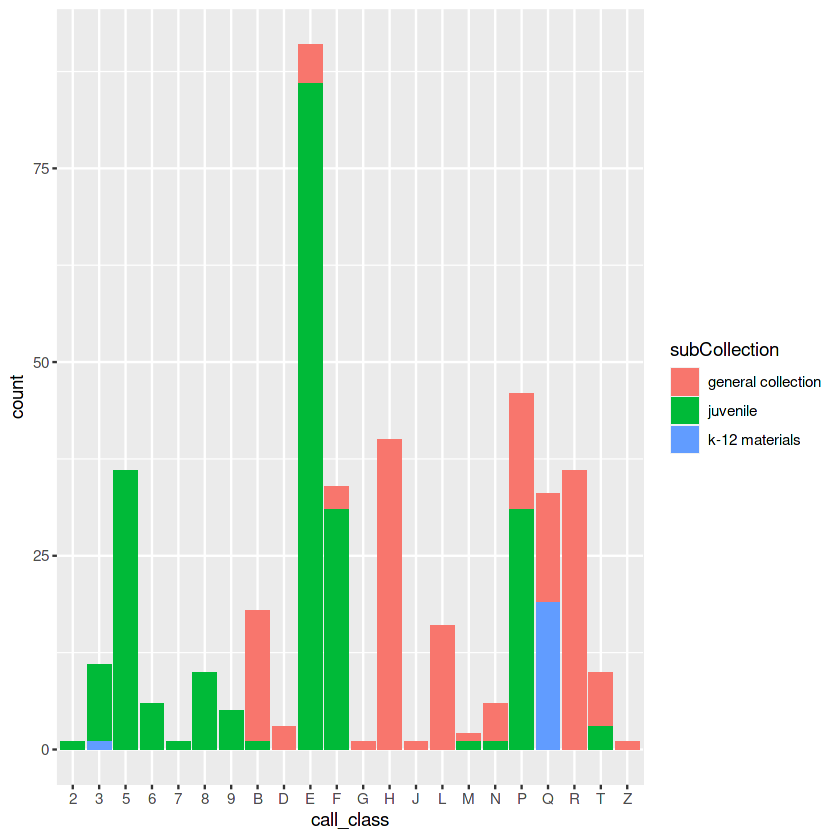

In [26]:
ggplot(data = booksHighUsage, aes(x = call_class)) +
  geom_bar(aes(fill = subCollection))

Stacked bar charts are generally more difficult to read than side-by-side bars. We can separate the portions of the stacked bar that correspond to each subCollection and put them side-by-side by using the `position` argument for `geom_bar()` and setting it to “dodge”.

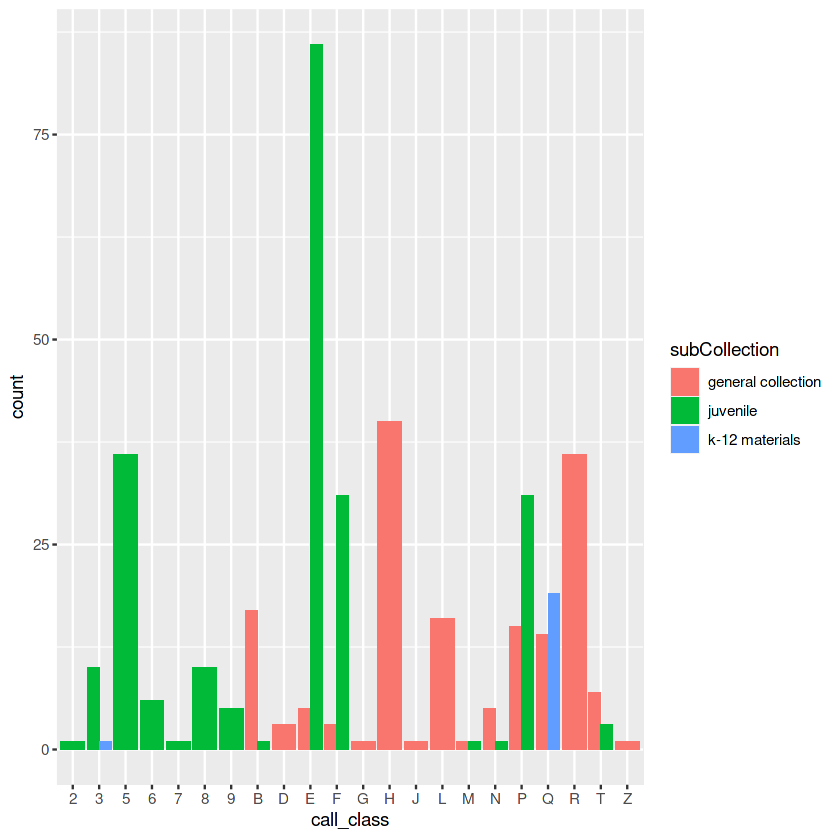

In [27]:
ggplot(data = booksHighUsage, aes(x = call_class)) +
  geom_bar(aes(fill = subCollection), position = "dodge")

The order of the classification scale is sorted for “library order.” The audience of library professionals typically prefer an alphabetical arrangement. However, the x-axis variable is actually categorical. Categorical data are easier to read when the bars are sorted by frequency. An easy way to sort by frequency is to use the `fct_infreq()` function from the `forcats` library.

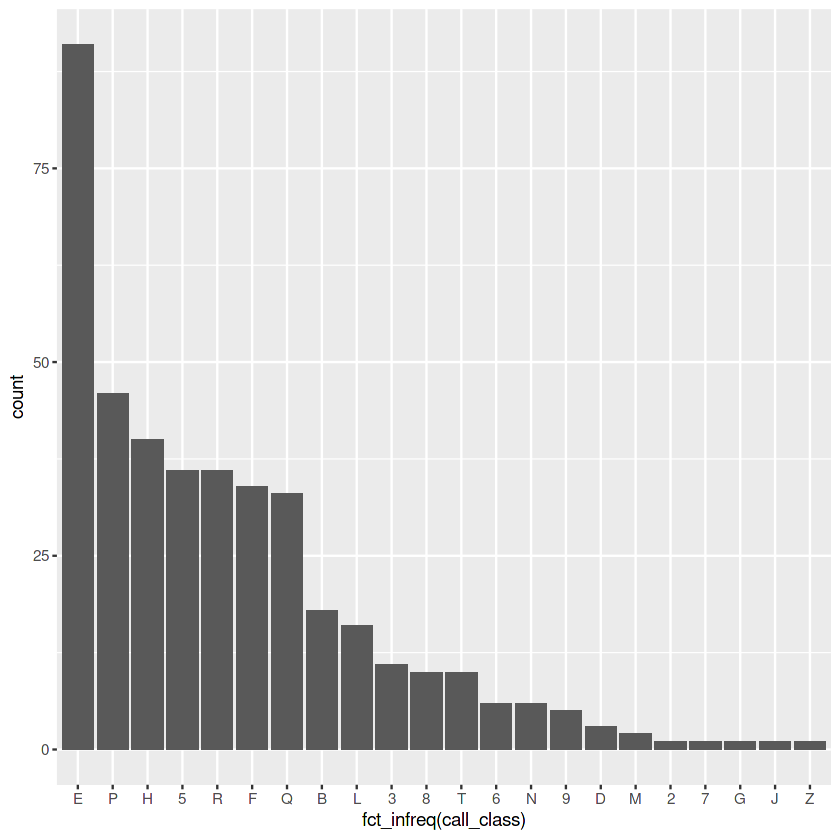

In [28]:
ggplot(data = booksHighUsage, aes(x = fct_infreq(call_class))) +
  geom_bar()

Another visualization issue is labeling. In many cultures, long labels are easier to read horizontally. Our goal is to flip the x-axis and reorient the x-axis labels into a horizontal presentation. To accomplish this, flip the axis coordinates with the `coord_flip()` function. When we flip the axes it’s important to reverse the sorted categorical order. Do this with `forcats::fct_rev()`.

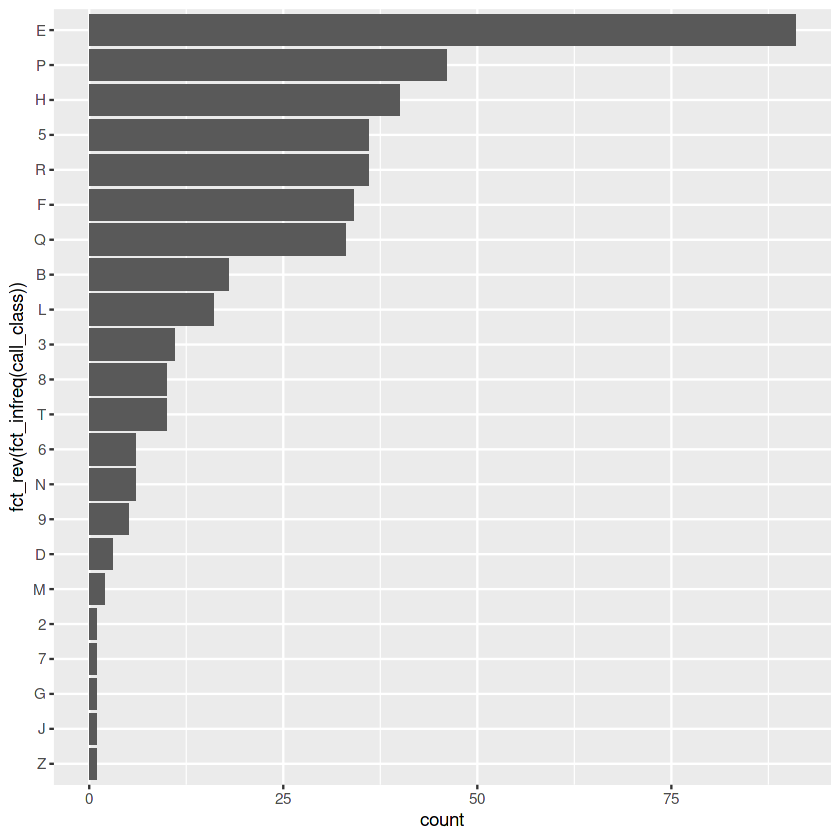

In [31]:
ggplot(data = booksHighUsage, aes(x = fct_rev(fct_infreq(call_class)))) +
  geom_bar() +
  coord_flip()

### Plotting time series data

Let’s calculate number of counts per year for each format for items published after 1990 and before 2002 in the `booksHighUsage` data frame created above.

First, we use the `ymd()` function from the `lubridate` package to convert our publication year into a POSIXct object. Pass the `truncated = 2` argument as a way to indicate that the `pubyear` column does not contain month or day. This means `1990` becomes `1990-01-01`. This will allow us to plot the number of books per year.

We will do this by calling `mutate()` to create a new variable `pubyear_ymd`.

In [32]:
booksPlot <- booksPlot %>%
  mutate(pubyear_ymd = ymd(pubyear, truncated = 2))  # convert pubyear to a Date object with ymd()

class(booksPlot$pubyear)  # integer

[1] "numeric"

In [33]:
class(booksPlot$pubyear_ymd)  # Date

[1] "Date"

Next we can use `filter` to remove the `NA` values and get books published between 1990 and 2003. Notice that we use the `&` as an AND operator to indicate that the date must fall between that range. We then need to group the data and count records within each group.

In [34]:
yearly_counts <- booksPlot %>%
  filter(!is.na(pubyear_ymd),
         pubyear_ymd > "1989-01-01" & pubyear_ymd < "2002-01-01") %>%
  count(pubyear_ymd, subCollection)

Time series data can be visualized as a line plot with years on the x axis and counts on the y axis:

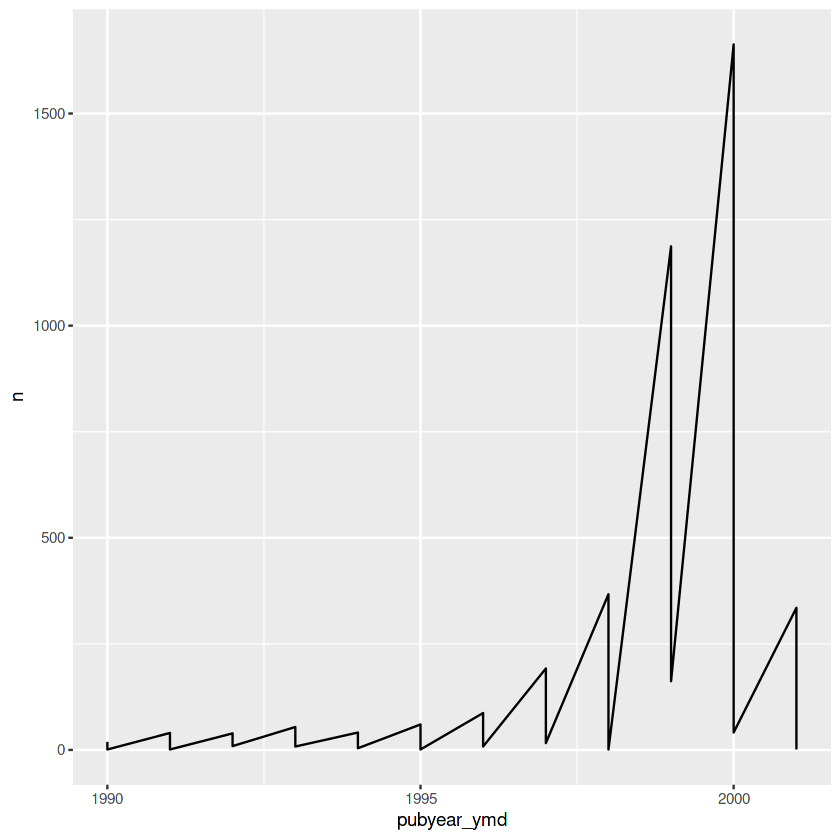

In [35]:
ggplot(data = yearly_counts, mapping = aes(x = pubyear_ymd, y = n)) +
     geom_line()

Unfortunately, this does not work because we plotted data for all the sub-collections together. We need to tell ggplot to draw a line for each sub-collection by modifying the aesthetic function to include `group = subCollection`:

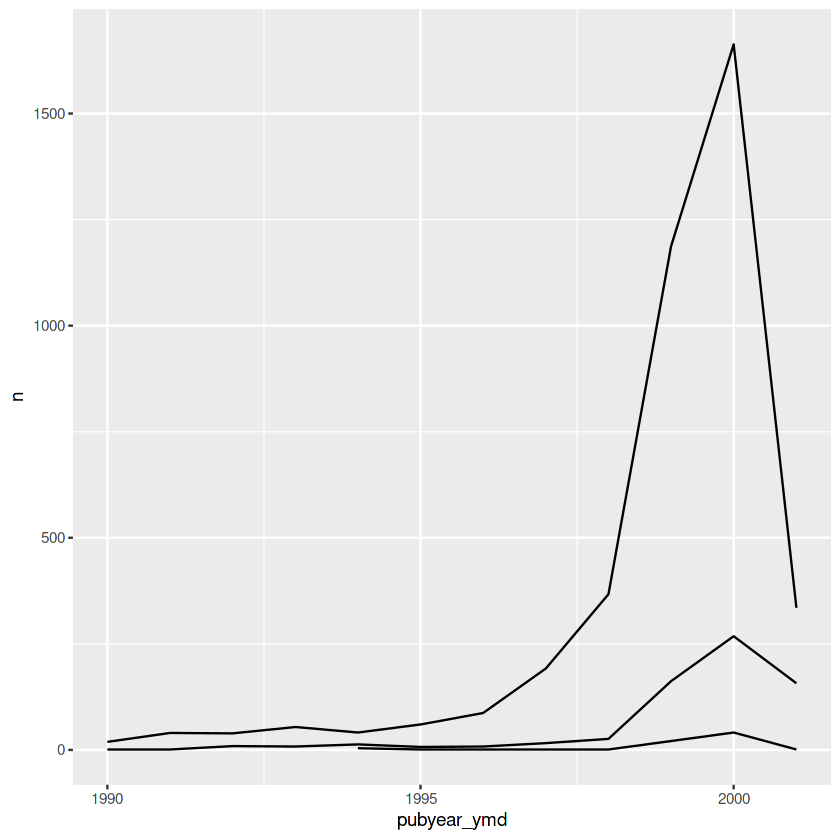

In [36]:
ggplot(data = yearly_counts, mapping = aes(x = pubyear_ymd, y = n, group = subCollection)) +
    geom_line()

We will be able to distinguish sub-collections in the plot if we add colors (using `color` also automatically groups the data):

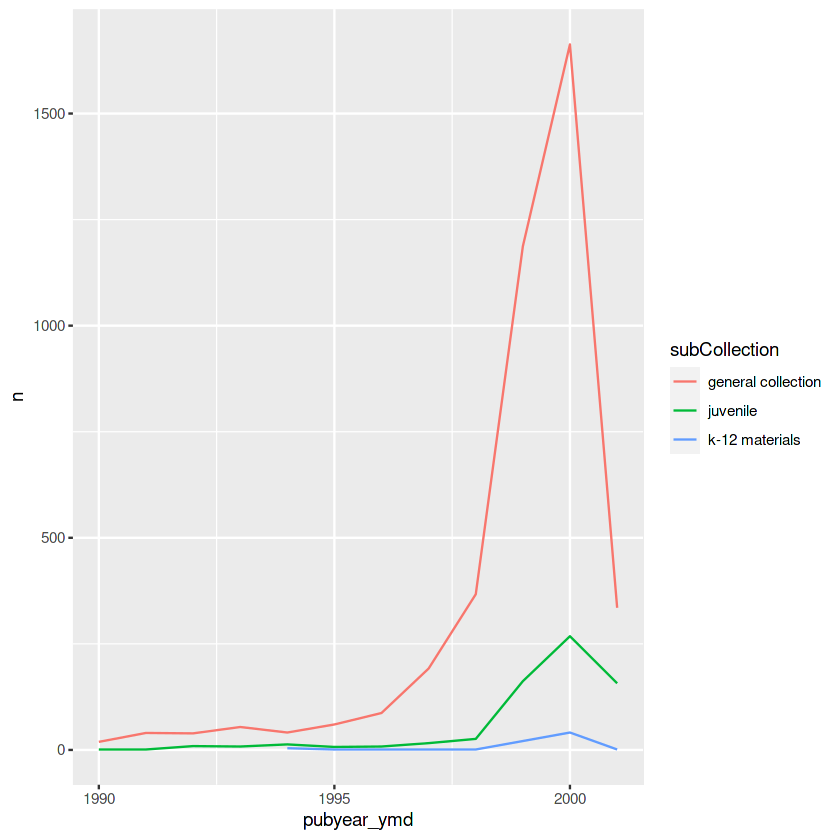

In [37]:
ggplot(data = yearly_counts, mapping = aes(x = pubyear_ymd, y = n, color = subCollection)) +
  geom_line()

#### Add a third variable with facets

Rather than creating a single plot with side-by-side bars for each sub-collection, we may want to create multiple plots, where each plot shows the data for a single sub-collection. This would be especially useful if we had a large number of sub-collections that we had sampled, as a large number of side-by-side bars will become more difficult to read.

`ggplot2` has a special technique called faceting that allows the user to split one plot into multiple plots based on a factor included in the dataset.

There are two types of `facet` functions:

- `facet_wrap()` arranges a one-dimensional sequence of panels to allow them to cleanly fit on one page.
- `facet_grid()` allows you to form a matrix of rows and columns of panels.

Both geometries allow to to specify faceting variables specified within `vars()`. For example, `facet_wrap(facets = vars(facet_variable))` or `facet_grid(rows = vars(row_variable), cols = vars(col_variable))`.

Here we use `facet_wrap()` to make a time series plot for each subCollection

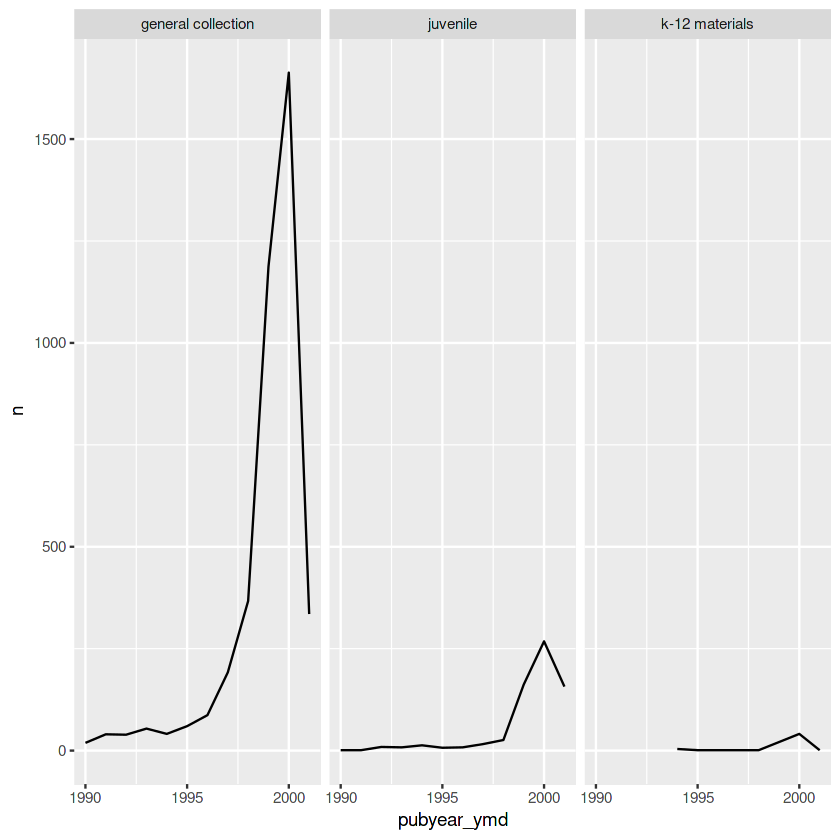

In [38]:
ggplot(data = yearly_counts, mapping = aes(x = pubyear_ymd, y = n)) +
    geom_line() +
    facet_wrap(facets = vars(subCollection))

We can use `facet_wrap()` as a way of seeing the categories within a variables. Look at the number of formats per sub-collection.

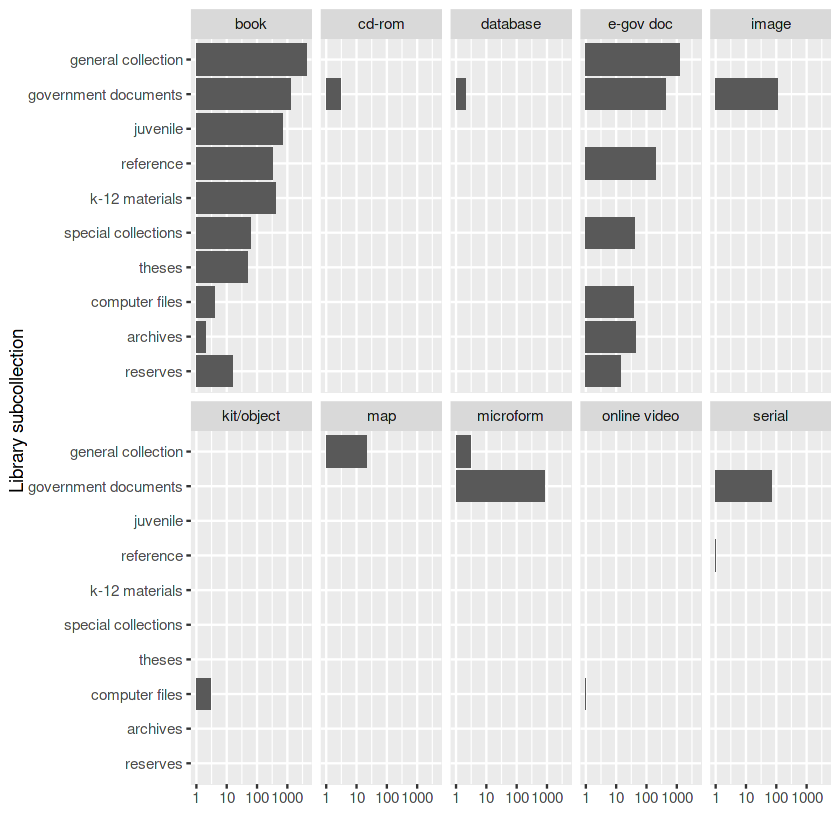

In [39]:
ggplot(data = books2, aes(x = fct_rev(fct_infreq(subCollection)))) +
  geom_bar() +
  facet_wrap(~ format, nrow = 2) +
  scale_y_log10() +
  coord_flip() +
  labs(x = "Library subcollection", y = "")

While this may not be the most beautiful plot, these kinds of exercises can be helpful for data exploration. We learn that there are books in all sub-collections; there are CD-ROMS, serials, images, and microforms in government documents, and so on. Exploratory plots visually surface information about your data that are otherwise difficult to parse. Sometimes they may not meet all the rules for creating beautiful data, but when you are simply getting to know your data, that’s OK.

### ggplot2 themes

Usually plots with white background look more readable when printed. Every single component of a `ggplot` graph can be customized using the generic `theme()` function. However, there are pre-loaded themes available that change the overall appearance of the graph without much effort.

For example, we can change our graph to have a simpler white background using the `theme_bw()` function:

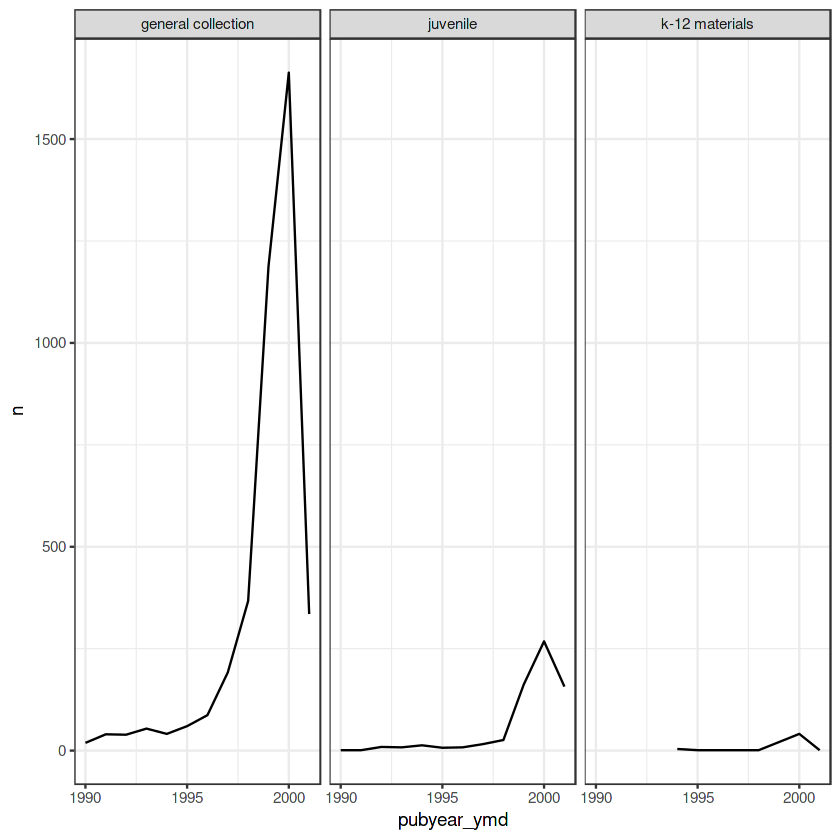

In [40]:
ggplot(data = yearly_counts, mapping = aes(x = pubyear_ymd, y = n)) +
  geom_line() +
  facet_wrap(facets = vars(subCollection)) +
  theme_bw()

In addition to `theme_bw()`, which changes the plot background to white, `ggplot2` comes with several other themes which can be useful to quickly change the look of your visualization. The complete list of themes is available at https://ggplot2.tidyverse.org/reference/ggtheme.html. `theme_minimal()` and `theme_light()` are popular, and `theme_void()` can be useful as a starting point to create a new hand-crafted theme.

The [ggthemes](https://jrnold.github.io/ggthemes/reference/index.html) package provides a wide variety of options. The [`ggplot2` extensions website](https://exts.ggplot2.tidyverse.org/) provides a list of packages that extend the capabilities of `ggplot2`, including additional themes.

### Customization

Take a look at the [`ggplot2` cheat sheet](https://github.com/rstudio/cheatsheets/raw/master/data-visualization-2.1.pdf), and think of ways you could improve your plots.

For example, by default, the axes labels on a plot are determined by the name of the variable being plotted. We can change names of axes to something more informative than ‘pubyear_ymd’ and ‘n’ and add a title to the figure:

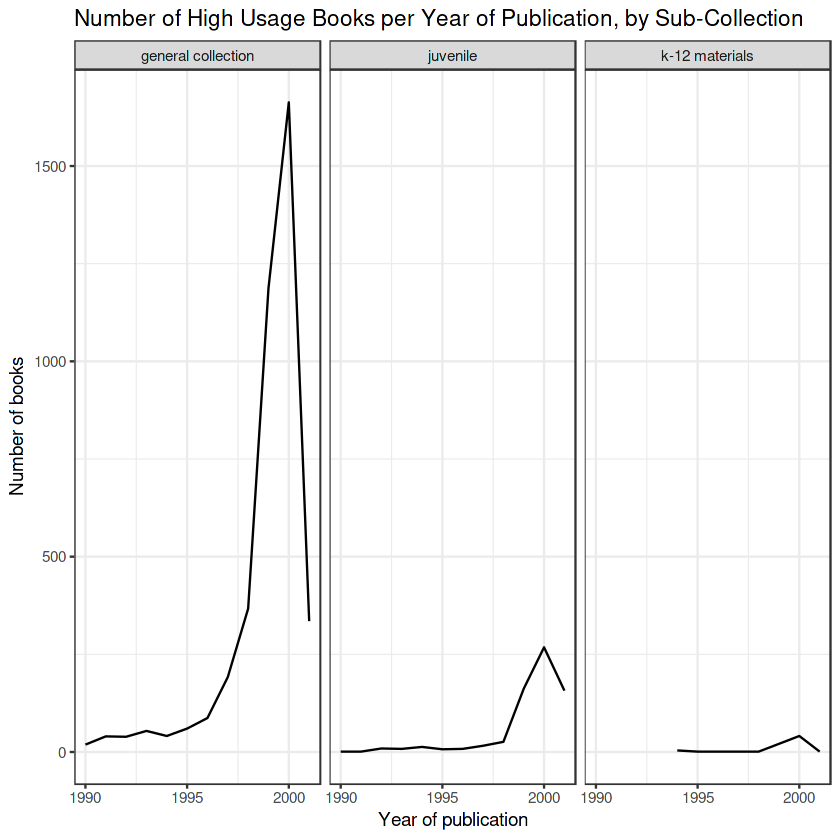

In [41]:
# add labels
ggplot(data = yearly_counts, mapping = aes(x = pubyear_ymd, y = n)) +
  geom_line() +
  facet_wrap(facets = vars(subCollection)) +
  theme_bw() +
    labs(title = "Number of High Usage Books per Year of Publication, by Sub-Collection",
        x = "Year of publication",
        y = "Number of books")

Note that it is also possible to change the fonts of your plots. If you are on Windows, you may have to install the [extrafont package](https://github.com/wch/extrafont), and follow the instructions included in the README for this package.

You can also assign a `theme` to an object in your environment, and pass that theme to your plot. This can be helpful to keep your `ggplot()` calls less cluttered. Here we create a `gray_theme` :

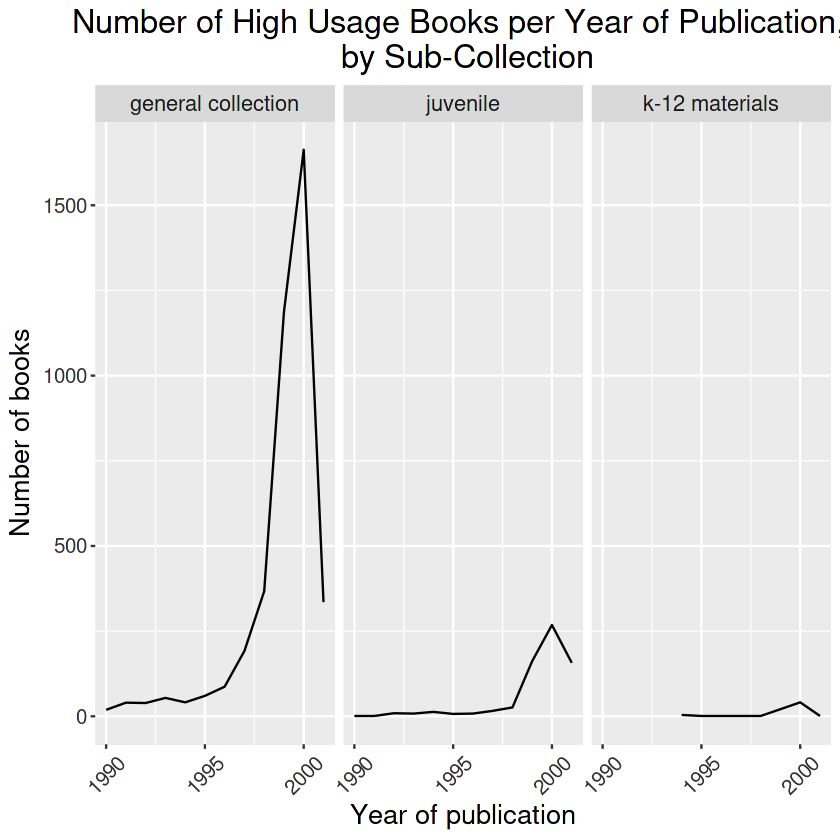

In [42]:
# create the gray theme
gray_theme <- theme(axis.text.x = element_text(color = "gray20", size = 12, angle = 45, hjust = 0.5, vjust = 0.5),
                    axis.text.y = element_text(color = "gray20", size = 12),
                    text = element_text(size = 16),
                    plot.title = element_text(hjust = 0.5))

# pass the gray theme to a plot
ggplot(data = yearly_counts, mapping = aes(x = pubyear_ymd, y = n)) +
  geom_line() +
  facet_wrap(facets = vars(subCollection)) +
  gray_theme +
  labs(title = "Number of High Usage Books per Year of Publication, \n by Sub-Collection",
        x = "Year of publication",
        y = "Number of books")

#### Challenge

Use the `booksPlot` data to create a plot that depicts how the total number of checkouts changes based on year of publication.

First, create a data frame `yearly_checkouts` That meets the following conditions:

- `filter()` to exclude `NA` values
- `filter()` between “1989-01-01” and “2002-01-01”
- `group_by()` the publication year (make sure to use the special Date pubyear value we created)
- `summarize()` to create a new value `checkouts_sum` that represents the `sum()` of total checkouts per publication year

Then, create a `ggplot` that visualizes the sum of item checkouts by year of publication. Add one of the themes listed above.

### Save and export

After creating your plot, you can save it to a file in your favorite format. The Export tab in the Plot pane in RStudio will save your plots at low resolution, which will not be accepted by many journals and will not scale well for posters.

Instead, use the ggsave() function, which allows you easily change the dimension and resolution of your plot by adjusting the appropriate arguments (width, height and dpi). We have been printing our plot output directly to the console. To use ggsave(), first assign the plot to a variable in your R environment, such as yearly_counts_plot.

Make sure you have the fig_output/ folder in your working directory.

In [43]:
yearly_counts_plot <- ggplot(data = yearly_counts, mapping = aes(x = pubyear_ymd, y = n)) +
  geom_line() +
  facet_wrap(facets = vars(subCollection)) +
  gray_theme +
  labs(title = "Number of High Usage Books per Year of Publication, \n by Sub-Collection",
        x = "Year of publication",
        y = "Number of books")

ggsave("fig_output/yearly_counts_plot.png", yearly_counts_plot, width = 15, height = 10)

### Key Points

- `ggplot2` is a flexible and useful tool for creating plots in R.
- The data set and coordinate system can be defined using the `ggplot` function.
- Additional layers, including geoms, are added using the `+` operator.
- Boxplots are useful for visualizing the distribution of a continuous variable.
- Barplot are useful for visualizing categorical data.
- Faceting allows you to generate multiple plots based on a categorical variable.